In [6]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

print(x,y)
# del X_train,X_test

[[ 0.9944479  -1.51666697]
 [-0.3404792  -0.39546072]
 [-0.92978    -1.44854911]
 ...
 [-2.91953119 -1.96829635]
 [ 0.1717912  -1.53408936]
 [-2.54105874 -1.67856635]] [0 1 1 ... 1 0 1]


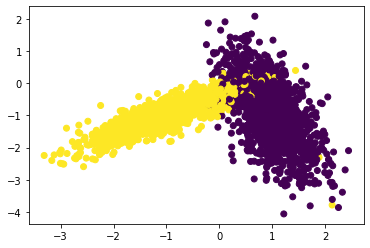

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

[15, 21, 22, 31, 37, 40, 42, 45, 46, 49]


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.61it/s]


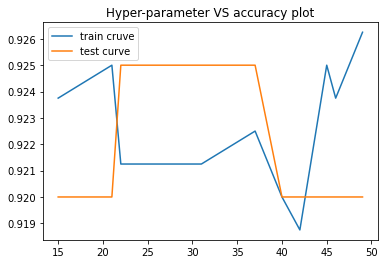

In [8]:
from sklearn.datasets import make_classification#This library creates a random dataset normally distributed.
from sklearn.model_selection import train_test_split#split the data into test and train
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
import random

x,y= make_classification(n_samples=1000,n_features=2, n_informative=2, n_redundant=0,n_clusters_per_class= 1, n_classes=2,random_state=60 )
#print(x, y)
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2 , train_size=0.8 )
#print(x_train, x_test, y_train, y_test)

fold=3#fold value
param_range=(10,50)#range of the values for k
classifier= KNeighborsClassifier()#calling the classifier
param=sorted(random.sample(range(param_range[0], param_range[1]),10 ))#(range(start, stop, number of values))
print(param)
def random_search_cv(x_train, y_train,classifier, param, fold):
    '''This function will calculate the train and CV error for each k value
    '''
    train_score=[]#To finally store the train score
    test_score=[]# To finally store the test_score
    for k in tqdm(param):
        test_block=[]
        train_block=[]
        additive=int(len(x_train)/fold)#The index value will move as length_of_train/Fold so using it to index
        plus=additive
        start_index=0
        initial_index=0
        for iteration in (range(0,fold)):
            fold_x_test=x_train[initial_index:plus]#initial index will be 0 & len(train)/fold for test & rest will be for training
            fold_y_test=y_train[initial_index:plus]
            #print(len(fold_x_test), len(fold_y_test))
            test_index=list(range(initial_index,plus))#creating a list of the index values to remove the test values in the train using set in the net step
            train_index=list(set(range(0,len(x_train)))-set(test_index))
            fold_x_train=x_train[train_index]
            fold_y_train=y_train[train_index]
            #print(len(fold_x_test), len(fold_y_test),len(fold_x_train), len(fold_y_train) )
            classifier.n_neighbors=k#Defining the value of k
            classifier.fit(x_train, y_train)#Training using training data
            
            test_predict_y=classifier.predict(x_test)#getting the y values predicted
            test_block.append(accuracy_score(y_test,test_predict_y))#appending the scores based on the y values.
            
            train_predict_y=classifier.predict(x_train)#predicting the y_i for training data
            train_block.append(accuracy_score(y_train,train_predict_y))#appending the scores
            initial_index+=(int(len(x_train)/fold))#Iteratively the index for train & test should change hence addition operation
            plus+=(int(len(x_train)/fold))#addition for the index values
            #print(len(fold_x_test), len(fold_y_test),len(fold_x_train) )
        test_score.append(np.mean(np.array(test_block)))#taking average of the scores for folds
        train_score.append(np.mean(np.array(train_block)))
    return(train_score,test_score )

train_score, test_score= random_search_cv(x_train, y_train,classifier, param, fold)
#print(train_score, test_score)

params = {'n_neighbors':(param)}

plt.plot(params['n_neighbors'],train_score, label='train cruve')
plt.plot(params['n_neighbors'],test_score, label='test curve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [8]:
m=x_train.copy()
print(len(m))
n=m[:30]
print(len(n))
intercept=list(range(0,30))
#print(intercept)
final=list(set(range(0,len(x_train)))-set(intercept))
print(len(final))
m[final]

print(int(2.6))
m=[0.85, 0.85, 0.85]

800
30
770
2


# Observation

- The k value is the hyperparameter in the KNN algorithm, so for Random CV within the range (0- 100) did not yield or show a result where the accuracy/score drops but was random.
- Hence the range should be alteast kept as half of the size of the data to see the pattern of the acurracy dropping.

<ipython-input-5-bcf1f7d2c6f8>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


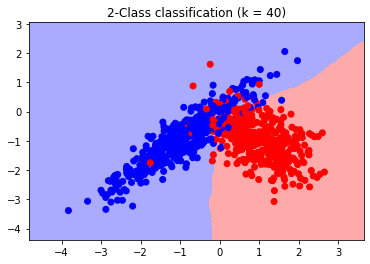

In [5]:
# understanding this code line by line is not that importent 
from matplotlib.colors import ListedColormap
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

classifier= KNeighborsClassifier(n_neighbors=40)
classifier.fit(x_train, y_train)
plot_decision_boundary(x_train[:,0],x_train[:,1],y_train, classifier)

<ipython-input-5-bcf1f7d2c6f8>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


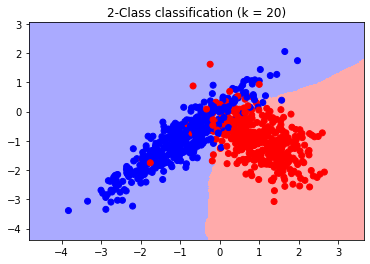

In [6]:
classifier= KNeighborsClassifier(n_neighbors=20)
classifier.fit(x_train, y_train)
plot_decision_boundary(x_train[:,0],x_train[:,1],y_train, classifier)

<ipython-input-5-bcf1f7d2c6f8>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


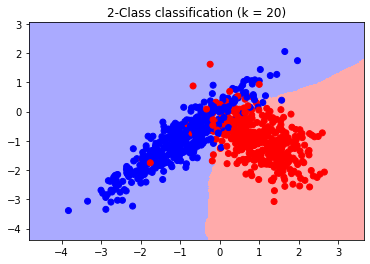

In [7]:
classifier= KNeighborsClassifier(n_neighbors=20)
classifier.fit(x_train, y_train)
plot_decision_boundary(x_train[:,0],x_train[:,1],y_train, classifier)

<ipython-input-5-bcf1f7d2c6f8>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


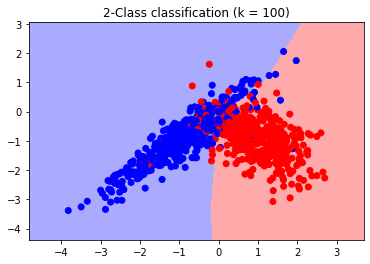

In [11]:
classifier= KNeighborsClassifier(n_neighbors=100)
classifier.fit(x_train, y_train)
plot_decision_boundary(x_train[:,0],x_train[:,1],y_train, classifier)